## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio.

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*.

Question *7* is about data ethics issue.

In [ ]:
your_name = "Najam Naseer"
your_student_id = "44428693"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [ ]:
df = pd.read_csv('car_sells_clean_data.csv')
print(len(df))

3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [ ]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


In [ ]:


from sklearn.preprocessing import OrdinalEncoder






from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder(dtype=int)

df["seller_type_new"] = ord_enc.fit_transform(df[["seller_type"]])
df["fuel_new"] = ord_enc.fit_transform(df[["fuel"]])
df["owner_new"] = ord_enc.fit_transform(df[["owner"]])


correlations = df[[ 'fuel_new','owner_new', 'selling_price','year','km_driven','seller_type_new',]].corr()
print(correlations)#all the corelattions

print('corellations between the colums with selling_price')
print('fuel   ',df['fuel_new'].corr(df['selling_price']))
print('owner  ',df['owner_new'].corr(df['selling_price']))
print('sellp  ',df['selling_price'].corr(df['selling_price']))
print('year   ',df['year'].corr(df['selling_price']))
print('kmdri  ',df['km_driven'].corr(df['selling_price']))
print('seller_type    ',df['seller_type_new'].corr(df['selling_price']))

                 fuel_new  owner_new  selling_price      year  km_driven  \
fuel_new         1.000000  -0.017217      -0.277627 -0.118542  -0.297764   
owner_new       -0.017217   1.000000      -0.205524 -0.433406   0.306730   
selling_price   -0.277627  -0.205524       1.000000  0.411103  -0.177203   
year            -0.118542  -0.433406       0.411103  1.000000  -0.404058   
km_driven       -0.297764   0.306730      -0.177203 -0.404058   1.000000   
seller_type_new  0.036755   0.239288      -0.208637 -0.139135   0.147376   

                 seller_type_new  
fuel_new                0.036755  
owner_new               0.239288  
selling_price          -0.208637  
year                   -0.139135  
km_driven               0.147376  
seller_type_new         1.000000  
corellations between the colums with selling_price
fuel    -0.27762704341734884
owner   -0.20552358731122436
sellp   1.0
year    0.4111027622063309
kmdri   -0.17720277985723887
seller_type     -0.2086370484027694


we learn that year is positivly corelated. if year increases so does the selling _price

fuel type,owner, selleer type and km_driven are weak corelations where

km_driven has least negagtive correlation among them.

overall the corellation of selling_price is moderate.


### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [ ]:
print("         ")
traincase1, testcase1 = train_test_split(df, test_size=0.9, random_state=42)
print('Case1 tr', traincase1.shape)
print('Case1 te', testcase1.shape)
print("                ")
traincase2, testcase2 = train_test_split(df, test_size=0.1, random_state=42)
print('C2: Tr ', traincase2.shape)
print('C2: Te', testcase2.shape)

         
Case1 tr (365, 11)
Case1 te (3292, 11)
                
C2: Tr  (3291, 11)
C2: Te (366, 11)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [ ]:
from sklearn.linear_model import LinearRegression

# Case 1 - 2 most
reg_p1 = LinearRegression()
X_train_p1 = traincase1[['year', 'fuel_new']]
y_train_p1 = traincase1['selling_price']

X_test_p1 = testcase1[['year', 'fuel_new']]
y_test_p1 = testcase1['selling_price']

reg_p1.fit(X_train_p1, y_train_p1)

# Case 1 - least
reg_p1_1 = LinearRegression()
X_train_p2 = traincase1[['km_driven', 'owner_new']]
y_train_p2 = traincase1['selling_price']

X_test_p2 = testcase1[['km_driven', 'owner_new']]
y_test_p2 = testcase1['selling_price']

reg_p1_1.fit(X_train_p2, y_train_p2)

# Case 2 most
reg_p2 = LinearRegression()
X_train_p3 = traincase2[['year', 'fuel_new']]
y_train_p3 = traincase2['selling_price']

X_test_p3 = testcase2[['year', 'fuel_new']]
y_test_p3 = testcase2['selling_price']

reg_p2.fit(X_train_p3, y_train_p3)

# Case 2 least
reg_p2_2 = LinearRegression()
X_train_p4 = traincase2[['km_driven', 'owner_new']]
y_train_p4 = traincase2['selling_price']

X_test_p4 = testcase2[['km_driven', 'owner_new']]
y_test_p4 = testcase2['selling_price']

reg_p2_2.fit(X_train_p4, y_train_p4)


LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model


mse1 = mean_squared_error(y_test_p1,reg_p1.predict(X_test_p1))
rmse1 = np.sqrt(mse1)


print(mse1, ' mse')
print(rmse1, 'rmse')
print("          ")

mse2 = mean_squared_error(y_test_p2,reg_p1_1.predict(X_test_p2))
rmse2 = np.sqrt(mse2)


print(mse2,'  mse')
print(rmse2,' rmse')
print("      case2    ")
mse3 = mean_squared_error(y_test_p3,reg_p2.predict(X_test_p3))
rmse3 = np.sqrt(mse3)


print(mse3,'  mse')
print(rmse3,' rmse')
print("          ")
mse4 = mean_squared_error(y_test_p4,reg_p2_2.predict(X_test_p4))
rmse4 = np.sqrt(mse4)


print(mse4,' mse')
print(rmse4,' rmse')
print("          ")

240873725575.09454  mse
490788.8808592698 rmse
          
292715789614.6963   mse
541032.152108076  rmse
      case2    
141350876932.57782   mse
375966.59018133226  rmse
          
195254216561.59537  mse
441875.79313829285  rmse
          


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

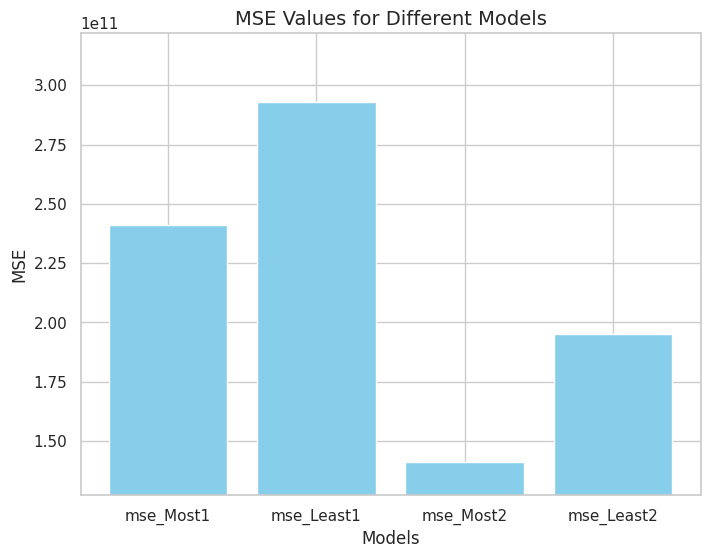

In [ ]:
import matplotlib.pyplot as plt


mse_values = [mse1, mse2, mse3, mse4]
models = ['mse_Most1', 'mse_Least1', 'mse_Most2', 'mse_Least2']

plt.figure(figsize=(8, 6))
plt.bar(models,mse_values, color='skyblue')
plt.xlabel('Models', size=12)
plt.ylabel('MSE', size=12)
plt.title('MSE Values for Different Models', size=14)
plt.ylim(min(mse_values)*0.9, max(mse_values) * 1.1)  # Adjust ylim to fit data better
plt.show()


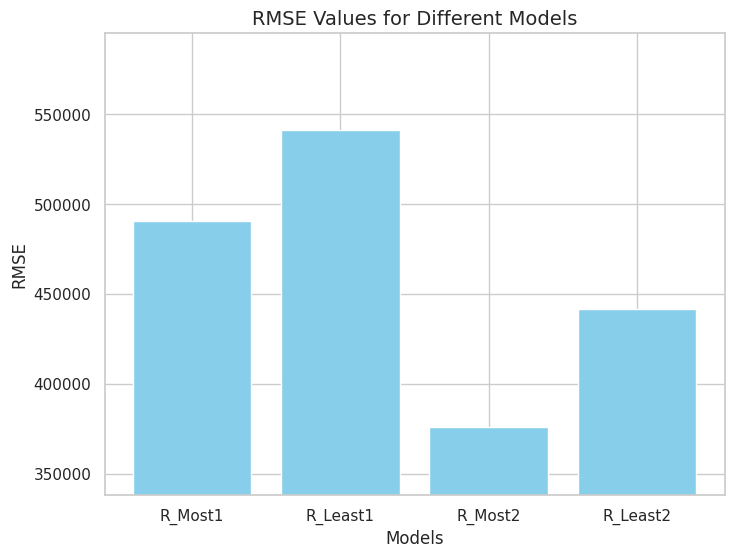

In [ ]:
import matplotlib.pyplot as plt


rmse_values = [rmse1, rmse2, rmse3, rmse4]
models = ['R_Most1', 'R_Least1', 'R_Most2', 'R_Least2']


plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Models', size=12)
plt.ylabel('RMSE', size=12)
plt.title('RMSE Values for Different Models', size=14)
plt.ylim(min(rmse_values)*0.9, max(rmse_values) * 1.1)
plt.show()


as we can see that mse_most 1 is greater than mse_most 2 which means that the higher the amount of training data we use the higher the prediction is.

WHen looking at mse_most1 and mse_least1 the latter is greater indicating that features that are more corellated deliver better predictions.



### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


From the articles and the picture provided it is aubundently clear that misrepresantaion due to bias and objectives of different individuals and Governing bodies is one of the biggest ethical concern of the infographics. For example the for the results of the summer olypics of 2008, we can see two different charts one with showing countries ranked according to gold medals won and other showing countires ranked according to total medals one. Depending on which chart gets published the potential reader would be lead to believe that the country on top of that particular list was the most successful in the olympics whereas in reality only the gold medals won count towards the overall success of a country at the event.These actions have certain emotional impact on the audiences where they could be minupilated into believeing any thing that the governing bodies intend them to. Although the data is not incorrect, the way it is being represented gives rise to ethical concerns of malpractice and misleading the masses.